In [1]:
from numpy.random import randn ,seed
from numpy import exp
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

In [2]:
seed(42)
data = randn(10000)
data

array([ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.70531672,
        0.49576557,  0.64438845], shape=(10000,))

In [3]:
print('normal :')
for d in data[:10]:
    print(d)

print('exp :')
for de in data[:10]:
    print(exp(de))

data = exp(data)
print('type new data :',type(data))

normal :
0.4967141530112327
-0.13826430117118466
0.6476885381006925
1.5230298564080254
-0.23415337472333597
-0.23413695694918055
1.5792128155073915
0.7674347291529088
-0.4694743859349521
0.5425600435859647
exp :
1.6433127155860012
0.8708684897640193
1.9111182426600926
4.586099388741997
0.7912404503034572
0.7912534408171102
4.851135569125472
2.154232968599504
0.6253308646154591
1.7204055425502467
type new data : <class 'numpy.ndarray'>


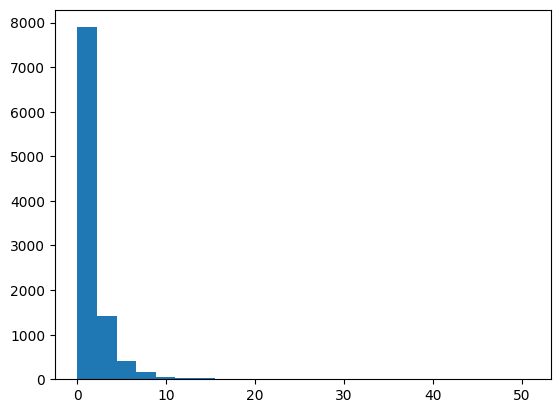

In [4]:
pyplot.hist(data,bins=23)
pyplot.show()

In [5]:
data = data.reshape(len(data),1)
print(data.shape)
data

(10000, 1)


array([[1.64331272],
       [0.87086849],
       [1.91111824],
       ...,
       [0.4939521 ],
       [1.64175464],
       [1.90482179]], shape=(10000, 1))

In [6]:
power = PowerTransformer(method='yeo-johnson')
data_transform = power.fit_transform(data)
data_transform

array([[ 0.55517375],
       [-0.19395135],
       [ 0.72790823],
       ...,
       [-0.81422317],
       [ 0.5540742 ],
       [ 0.72418611]], shape=(10000, 1))

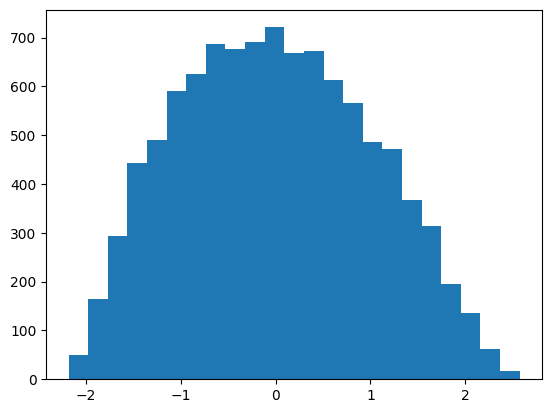

In [7]:
pyplot.hist(data_transform,bins=23)
pyplot.show()

In [8]:
power = PowerTransformer(method='box-cox')
data_transform = power.fit_transform(data)
data_transform

array([[ 0.4973978 ],
       [-0.13534745],
       [ 0.64780304],
       ...,
       [-0.70062489],
       [ 0.49645275],
       [ 0.64451555]], shape=(10000, 1))

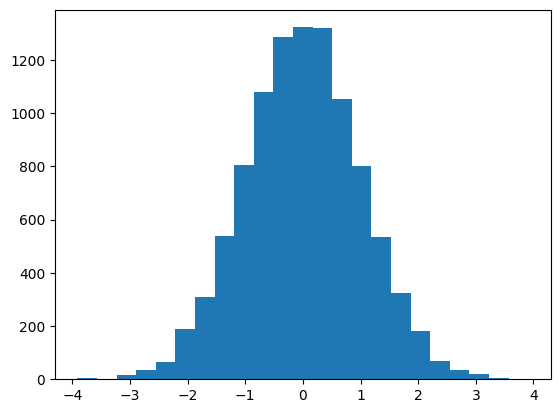

In [9]:
pyplot.hist(data_transform,bins=23)
pyplot.show()

In [10]:
from pandas import read_csv ,DataFrame
from numpy import std,mean
from sklearn.model_selection import cross_val_score ,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder ,StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [12]:
print('describe data :')
df.describe()

describe data :


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
print('info data :')
df.info()

info data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    flo

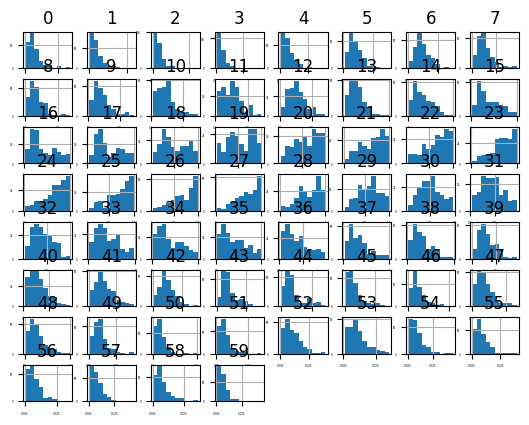

In [14]:
df.hist(xlabelsize=2,ylabelsize=2)
pyplot.show()

In [15]:
data = df.values
data

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']],
      shape=(208, 61), dtype=object)

In [16]:
X ,y = data[:,:-1] ,data[:,-1]
X.shape ,y.shape

((208, 60), (208,))

In [17]:
X = X.astype('float32')
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]],
      shape=(208, 60), dtype=float32)

In [18]:
y = LabelEncoder().fit_transform(y.astype('str'))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10 ,n_repeats=3 ,random_state=42)
n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy : 80.468 (0.083)


box cox : فقط روی داده های مثبت اعمال میشود 

In [20]:
data = df.values[:,:-1]
scaler = MinMaxScaler(feature_range=(1,2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('scaler',scaler),('power',power)])
data = pipeline.fit_transform(data)
df = DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.256116,0.282017,0.301127,-0.982009,0.681506,0.081184,0.663652,0.551560,1.255030,0.263955,...,0.880460,-1.749761,-0.523093,0.872831,-0.086107,1.473959,1.603657,0.415013,0.507896,-0.768147
1,1.077697,0.800442,1.331746,0.736953,1.041114,2.026916,1.442733,1.952448,1.375533,0.811288,...,-0.153744,-0.471731,-0.070495,-0.914943,0.327010,1.687965,1.244865,-0.376739,-0.317468,-0.317052
2,0.180358,0.961495,1.683384,1.440613,0.716374,1.780405,1.726734,2.079715,2.147311,2.110942,...,-1.544162,1.240491,0.980099,0.011140,1.351189,2.042926,2.200642,1.427749,0.593787,0.620203
3,-1.198623,-0.723903,0.880622,-0.992382,-1.368593,-1.415466,-0.054152,0.138250,-1.322177,-0.558893,...,0.947886,0.120994,-1.185693,0.771889,0.168188,0.061656,-0.379419,-0.517589,-0.658931,1.288713
4,1.778717,1.160266,0.479874,-0.151823,-0.102048,-0.650117,0.142077,1.355346,1.485141,1.589206,...,0.196791,-1.641583,-0.757827,0.170913,0.579117,-1.701751,0.177871,-0.404262,0.782957,0.934708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.360241,0.179437,-0.898515,-1.141400,-0.678645,1.091149,1.298591,0.656561,0.744146,0.689432,...,0.645251,0.049333,0.080837,1.261514,-1.073796,0.611467,0.015873,0.905681,1.656794,1.712675
204,0.528874,-1.200903,-0.222216,0.410386,0.302338,0.026816,-0.256530,-0.250699,-0.628664,0.299040,...,-1.222258,-0.924940,-0.002100,0.590607,-0.281536,-0.173121,-0.888102,-0.891179,-0.066232,0.362588
205,1.291299,0.527675,-0.828382,-0.572272,-0.819597,0.415594,0.223472,-0.002450,-0.320931,0.582796,...,0.186220,0.605854,-1.368591,-0.845557,-0.304318,0.393345,1.244865,1.181668,0.262527,-0.809344
206,0.422288,0.208725,0.508501,0.532684,-1.528251,0.708587,0.554063,-0.085089,0.422411,0.455149,...,-1.379679,-0.435689,-0.940864,0.473254,-0.983327,-0.970556,-0.888102,0.319719,-0.783672,-0.182880


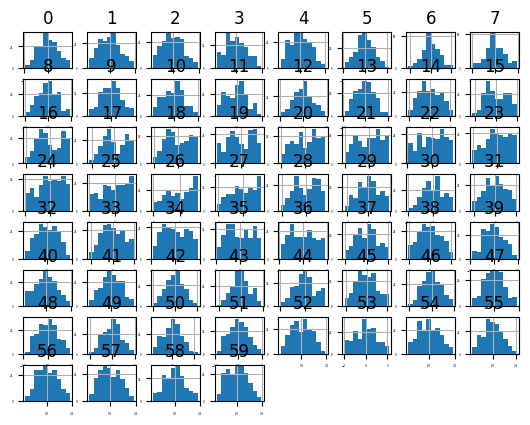

In [21]:
df.hist(xlabelsize=2,ylabelsize=2)
pyplot.show()

In [22]:
X = df.values
X = X.astype('float32')
X

array([[-0.25611636,  0.28201666,  0.30112696, ...,  0.41501266,
         0.5078961 , -0.7681467 ],
       [ 1.0776972 ,  0.8004423 ,  1.3317465 , ..., -0.37673932,
        -0.31746817, -0.31705248],
       [ 0.1803581 ,  0.96149534,  1.683384  , ...,  1.4277493 ,
         0.5937868 ,  0.62020314],
       ...,
       [ 1.2912993 ,  0.527675  , -0.82838154, ...,  1.1816684 ,
         0.2625266 , -0.8093445 ],
       [ 0.4222882 ,  0.20872529,  0.50850123, ...,  0.31971937,
        -0.7836716 , -0.18287976],
       [ 0.16768165,  0.24979682, -1.0942154 , ..., -0.7607314 ,
        -0.09011865,  1.2617604 ]], shape=(208, 60), dtype=float32)

In [23]:
n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy : 81.714 (0.103)


In [24]:
power = PowerTransformer(method='yeo-johnson')
X = power.fit_transform(X)
X = DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.225463,0.317688,0.334077,-0.987245,0.696084,0.086589,0.666160,0.556718,1.246241,0.275699,...,0.880757,-1.795468,-0.508509,0.876237,-0.050815,1.454615,1.549359,0.454674,0.526535,-0.756618
1,1.072342,0.813709,1.307262,0.754353,1.038437,2.012105,1.437072,1.932124,1.362547,0.814902,...,-0.151830,-0.455720,-0.048448,-0.914117,0.358579,1.658732,1.225077,-0.337775,-0.294914,-0.281625
2,0.213199,0.964430,1.628110,1.404103,0.729521,1.769607,1.717115,2.056185,2.101975,2.074105,...,-1.546863,1.228782,0.980459,0.029250,1.325593,1.995517,2.077769,1.386401,0.609773,0.644844
3,-1.218963,-0.710287,0.888209,-0.998473,-1.397108,-1.421142,-0.048967,0.146177,-1.334863,-0.551055,...,0.947941,0.143230,-1.196980,0.778264,0.202939,0.079614,-0.345690,-0.486198,-0.646843,1.265704
4,1.717822,1.148618,0.507265,-0.113256,-0.073364,-0.647414,0.147141,1.348309,1.468120,1.571462,...,0.198676,-1.680189,-0.750643,0.188405,0.601936,-1.735021,0.218643,-0.366624,0.791961,0.939993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.332465,0.217173,-0.896939,-1.160488,-0.665953,1.089696,1.294756,0.660582,0.750000,0.695436,...,0.646282,0.071881,0.102942,1.251119,-1.084634,0.621902,0.058029,0.914475,1.617108,1.648291
204,0.552439,-1.224421,-0.188450,0.443195,0.328529,0.032264,-0.251775,-0.243255,-0.620834,0.310482,...,-1.223391,-0.924673,0.020143,0.601592,-0.249864,-0.155895,-0.885265,-0.888560,-0.040181,0.398172
205,1.270950,0.555003,-0.822073,-0.549335,-0.813616,0.419882,0.228336,0.005680,-0.307878,0.590638,...,0.188115,0.619214,-1.389487,-0.842447,-0.273275,0.408101,1.225077,1.165861,0.286731,-0.800757
206,0.449560,0.245965,0.534798,0.560580,-1.569000,0.710883,0.557339,-0.077044,0.434375,0.464855,...,-1.381548,-0.418784,-0.940849,0.486686,-0.987412,-0.971670,-0.885265,0.363060,-0.776811,-0.143668


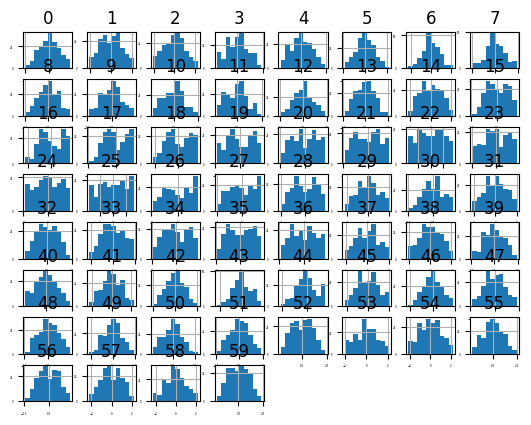

In [25]:
X.hist(xlabelsize=2,ylabelsize=2)
pyplot.show()

In [26]:
n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy : 81.556 (0.103)


In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
power = PowerTransformer(method='yeo-johnson',standardize=False)
X = power.fit_transform(X)
X = DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.225568,0.317240,0.333667,-0.990169,0.694612,0.086588,0.666176,0.556711,1.245374,0.275636,...,0.880649,-1.798951,-0.509390,0.875348,-0.050827,1.452355,1.538862,0.453254,0.526187,-0.759613
1,1.070406,0.811109,1.302219,0.752564,1.035397,2.011788,1.437135,1.932056,1.361532,0.814420,...,-0.151834,-0.456013,-0.048458,-0.915079,0.358058,1.655895,1.218114,-0.338586,-0.295030,-0.282092
2,0.213104,0.960895,1.620720,1.398668,0.727917,1.769352,1.717202,2.056110,2.099836,2.071617,...,-1.547156,1.226985,0.977527,0.029249,1.319857,1.991626,2.060439,1.375619,0.609315,0.642622
3,-1.221400,-0.712322,0.885677,-1.001457,-1.402268,-1.421316,-0.048967,0.146176,-1.335843,-0.551290,...,0.947818,0.143198,-1.201183,0.777547,0.202765,0.079605,-0.346370,-0.487815,-0.647355,1.258201
4,1.713403,1.143788,0.506362,-0.113304,-0.073383,-0.647457,0.147142,1.348272,1.466964,1.569914,...,0.198669,-1.683297,-0.752455,0.188356,0.600557,-1.738093,0.218362,-0.367572,0.791219,0.935575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.332687,0.216957,-0.899526,-1.164391,-0.667313,1.089587,1.294809,0.660572,0.749652,0.695076,...,0.646221,0.071873,0.102901,1.249438,-1.088676,0.621412,0.058008,0.909324,1.614472,1.636409
204,0.551862,-1.229859,-0.188586,0.442529,0.328170,0.032263,-0.251772,-0.243257,-0.621080,0.310403,...,-1.223585,-0.925757,0.020142,0.601146,-0.250125,-0.155930,-0.889184,-0.893484,-0.040183,0.397270
205,1.268334,0.553718,-0.824281,-0.550334,-0.815580,0.419863,0.228338,0.005680,-0.307944,0.590371,...,0.188109,0.618694,-1.394952,-0.843276,-0.273585,0.407878,1.218114,1.157911,0.286621,-0.804080
206,0.449168,0.245691,0.533801,0.559546,-1.575316,0.710832,0.557350,-0.077044,0.434249,0.464685,...,-1.381789,-0.419034,-0.943581,0.486385,-0.990829,-0.972778,-0.889184,0.362133,-0.777528,-0.143794


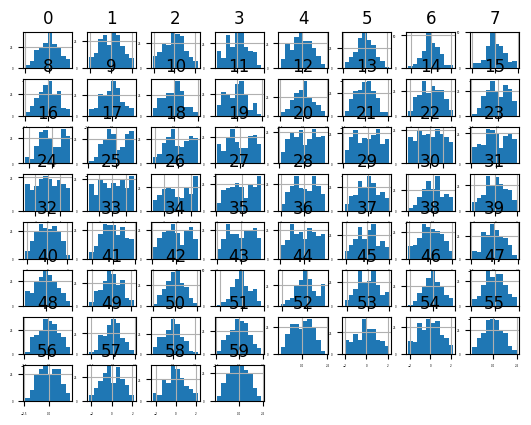

In [28]:
X.hist(xlabelsize=2,ylabelsize=2)
pyplot.show()

In [29]:
n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy : 81.714 (0.100)


Normal Quantile Transforms

In [30]:
from numpy.random import randn,seed
from numpy import exp
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

In [31]:
seed(87)
data = randn(1000)
data = exp(data)

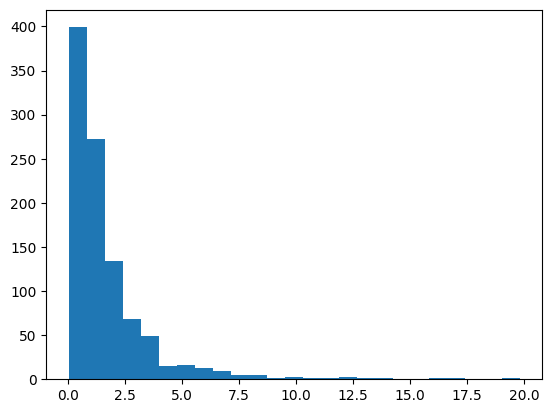

In [32]:
pyplot.hist(data,bins=25)
pyplot.show()
data = data.reshape(len(data),1)

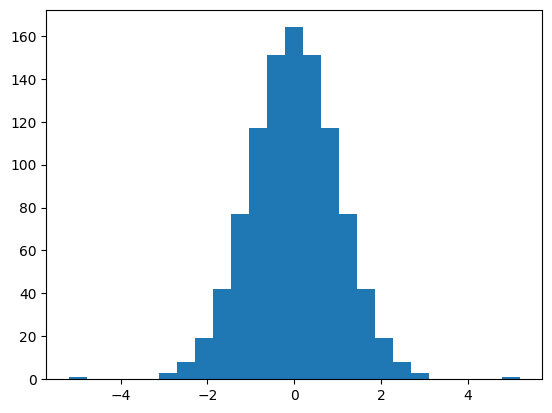

In [33]:
quantile = QuantileTransformer(output_distribution='normal')
data_transform = quantile.fit_transform(data)
pyplot.hist(data_transform,bins=25)
pyplot.show()

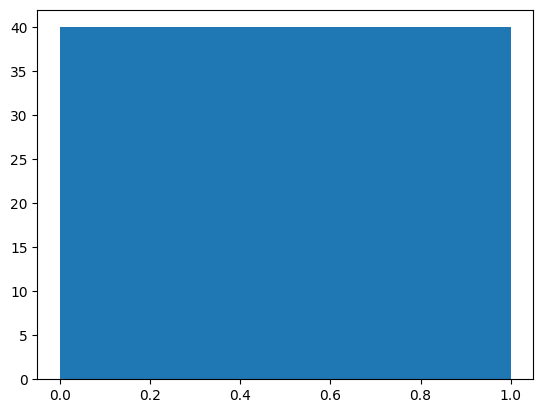

In [34]:
quantile = QuantileTransformer(output_distribution='uniform')
data_transform = quantile.fit_transform(data)
pyplot.hist(data_transform,bins=25)
pyplot.show()

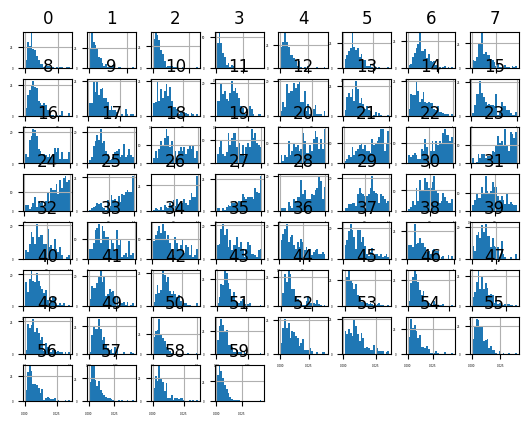

In [35]:
df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv',header=None)
df.hist(xlabelsize=2,ylabelsize=2,bins=25)
pyplot.show()

In [36]:
y = df.values[:,-1]
X = df.values[:,:-1] 
data = df.values[:,:-1]                                                                                        
quantile = QuantileTransformer(n_quantiles=100,output_distribution='normal')
data_transform = quantile.fit_transform(data)
df = DataFrame(data_transform)
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.297959,0.245669,0.301968,-1.006761,0.579953,0.105006,0.671395,0.515113,1.275289,0.218979,...,0.868512,-2.049594,-0.407337,0.867383,-0.088734,1.470545,1.491217,0.321971,0.527921,-0.604585
1,1.071037,0.764710,1.286922,0.705568,0.938893,2.038827,1.451177,1.768991,1.418279,0.814131,...,-0.203961,-0.430727,-0.066012,-0.798058,0.309124,1.722564,1.176698,-0.282216,-0.321971,-0.229884
2,0.210926,0.899990,1.545202,1.275597,0.622564,1.736449,1.797015,1.945078,2.067766,2.331005,...,-1.392945,1.211079,0.881465,0.027557,1.220640,2.083962,2.651966,1.376243,0.604585,0.544847
3,-1.120205,-0.637120,0.816627,-1.031871,-1.385957,-1.329321,0.023390,0.214015,-1.275817,-0.492158,...,0.906882,0.139710,-1.120205,0.737357,0.202669,0.088734,-0.295415,-0.430727,-0.635270,1.220640
4,1.708446,1.122901,0.447396,-0.091912,-0.129490,-0.718135,0.182208,1.358798,1.576882,1.563490,...,0.216904,-1.639976,-0.635270,0.191052,0.509517,-1.769757,0.165327,-0.321971,0.732656,0.831313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.407337,0.163762,-0.815786,-1.162893,-0.630349,1.070598,1.220640,0.667596,0.672378,0.669677,...,0.599383,0.020574,0.042395,1.168949,-1.055199,0.604585,0.063341,0.828465,1.496315,1.673260
204,0.527117,-1.177977,-0.155353,0.419839,0.322462,0.056059,-0.237817,-0.229619,-0.586360,0.289712,...,-1.078506,-0.889495,-0.037988,0.515705,-0.234219,-0.139710,-0.781781,-0.828465,-0.018165,0.321971
205,1.220640,0.501298,-0.716593,-0.464427,-0.764710,0.399590,0.237253,0.094602,-0.286942,0.544338,...,0.191052,0.568498,-1.331329,-0.764710,-0.269066,0.335333,1.176698,1.052675,0.295415,-0.666564
206,0.421623,0.185449,0.481155,0.574460,-1.659332,0.699539,0.575871,0.001809,0.456527,0.458679,...,-1.259833,-0.412820,-0.787522,0.450744,-0.927754,-0.920697,-0.781781,0.258143,-0.698526,-0.165327


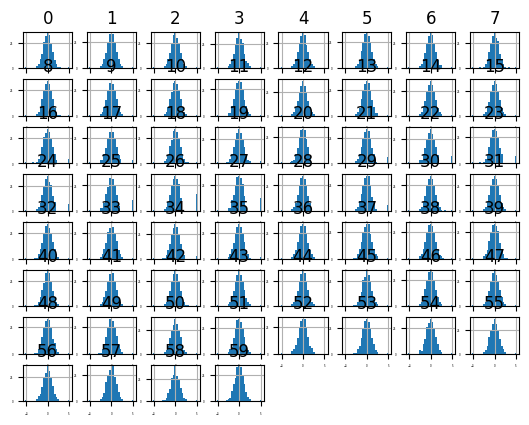

In [37]:
df.hist(xlabelsize=2,ylabelsize=2,bins=25)
pyplot.show()

In [38]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy : 80.468 (0.083)


In [40]:
X = df.values
n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy : 82.810 (0.083)
